In [1]:
from google.colab import auth
import gspread
from google.auth import default

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den

from tensorflow.keras.metrics import RootMeanSquaredError as rmse

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

sheet = gc.open('SomDocs DL-01').sheet1
rows = sheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})

In [4]:
df.head()

,Input,Output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [5]:
x = df[["Input"]] .values
y = df[["Output"]].values

In [6]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_n,y,test_size = 0.3,random_state = 3)

In [11]:
ai_brain = Seq([
    Den(9,activation = 'relu',input_shape=[1]),
    Den(16,activation = 'relu'),
    Den(1),
])

ai_brain.compile(optimizer = 'rmsprop',loss = 'mse')

ai_brain.fit(x_train,y_train,epochs=1000)
ai_brain.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 526ms/step - loss: 14387.7549
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 14380.1260
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 14374.4668
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 14369.6582
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 14365.3330
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 14361.3232
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 14357.5400
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 14353.9170
Epoch 9/1000
1/1 [==============================] - 0s 9ms/step - loss: 14350.4199
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 14347.0225
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 14343.7031
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 14340

<Axes: >

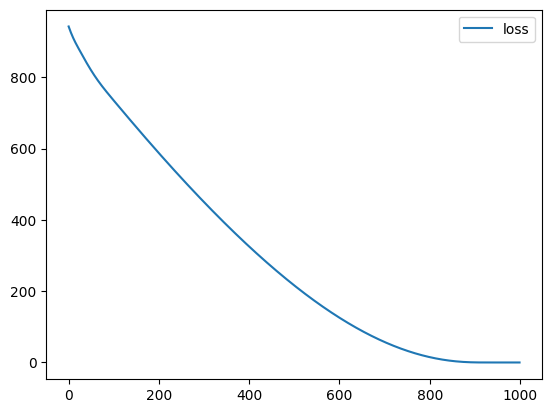

In [12]:
loss_plot = pd.DataFrame(ai_brain.history.history)
loss_plot.plot()

In [13]:
err = rmse()
preds = ai_brain.predict(x_test)
err(y_test,preds)

1/1 [==============================] - 0s 60ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.14787126>

In [14]:
x_n1 = [[9]]
x_n_n = scaler.transform(x_n1)
ai_brain.predict(x_n_n)

1/1 [==============================] - 0s 27ms/step


array([[91.12571]], dtype=float32)